In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [27]:
from tensorflow import math
from keras.utils import plot_model

In [28]:
nba_data=pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv")

In [29]:
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


In [30]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  289 non-null    object 
 1   last_name   289 non-null    object 
 2   team        289 non-null    object 
 3   salary      289 non-null    float64
 4   pos         289 non-null    object 
 5   age         289 non-null    int64  
 6   g           289 non-null    int64  
 7   gs          289 non-null    int64  
 8   mp          289 non-null    int64  
 9   fg          289 non-null    int64  
 10  fga         289 non-null    int64  
 11  fg%         289 non-null    float64
 12  3p          289 non-null    int64  
 13  3pa         289 non-null    int64  
 14  3p%         289 non-null    float64
 15  2p          289 non-null    int64  
 16  2pa         289 non-null    int64  
 17  2p%         289 non-null    float64
 18  efg%        289 non-null    float64
 19  ft          289 non-null    i

In [31]:
nba_data.isnull().sum()

first_name    0
last_name     0
team          0
salary        0
pos           0
age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg%           0
3p            0
3pa           0
3p%           0
2p            0
2pa           0
2p%           0
efg%          0
ft            0
fta           0
ft%           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
dtype: int64

In [32]:
nba_data_numeric=nba_data.copy()

In [33]:
del nba_data_numeric["first_name"]
del nba_data_numeric["last_name"]
del nba_data_numeric["team"]
del nba_data_numeric["pos"]
nba_data_numeric.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904


In [34]:
def clean_currency(x):
  if isinstance(x,str):
    return (x.replace('$','').replace(',',''))
  return x

In [35]:
nba_data_numeric["salary"]=nba_data_numeric["salary"].apply(clean_currency).astype("float")
nba_data_numeric.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904


In [36]:
print(nba_data_numeric.shape)

(289, 27)


In [37]:
nba_data_numeric.describe()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,2.890000e+02,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.00000,289.000000
mean,8.972877e+06,25.768166,56.619377,30.415225,1373.657439,237.546713,514.283737,0.458730,74.276817,208.335640,...,0.758394,55.598616,194.788927,250.387543,140.802768,44.529412,26.709343,75.211073,110.83045,647.304498
std,1.008679e+07,4.378557,18.081042,26.947104,698.833132,164.543135,347.674340,0.072096,63.139612,166.382283,...,0.109234,49.172226,138.198229,177.846596,126.966637,28.249385,24.822116,58.024125,58.04586,455.553247
min,5.318000e+03,19.000000,9.000000,0.000000,35.000000,3.000000,13.000000,0.231000,0.000000,1.000000,...,0.333000,2.000000,3.000000,7.000000,0.000000,0.000000,0.000000,2.000000,4.00000,12.000000
25%,2.033160e+06,22.000000,47.000000,5.000000,799.000000,110.000000,247.000000,0.411000,21.000000,70.000000,...,0.700000,22.000000,97.000000,125.000000,51.000000,25.000000,10.000000,38.000000,68.00000,299.000000
50%,4.259259e+06,25.000000,62.000000,21.000000,1406.000000,212.000000,465.000000,0.451000,57.000000,169.000000,...,0.770000,39.000000,174.000000,217.000000,99.000000,41.000000,19.000000,57.000000,106.00000,588.000000
75%,1.242000e+07,29.000000,70.000000,57.000000,1931.000000,324.000000,723.000000,0.496000,115.000000,320.000000,...,0.838000,73.000000,252.000000,334.000000,188.000000,62.000000,35.000000,100.000000,155.00000,892.000000
max,4.578097e+07,38.000000,82.000000,80.000000,2743.000000,774.000000,1564.000000,0.693000,285.000000,750.000000,...,1.000000,279.000000,813.000000,1019.000000,702.000000,138.000000,177.000000,292.000000,286.00000,2118.000000


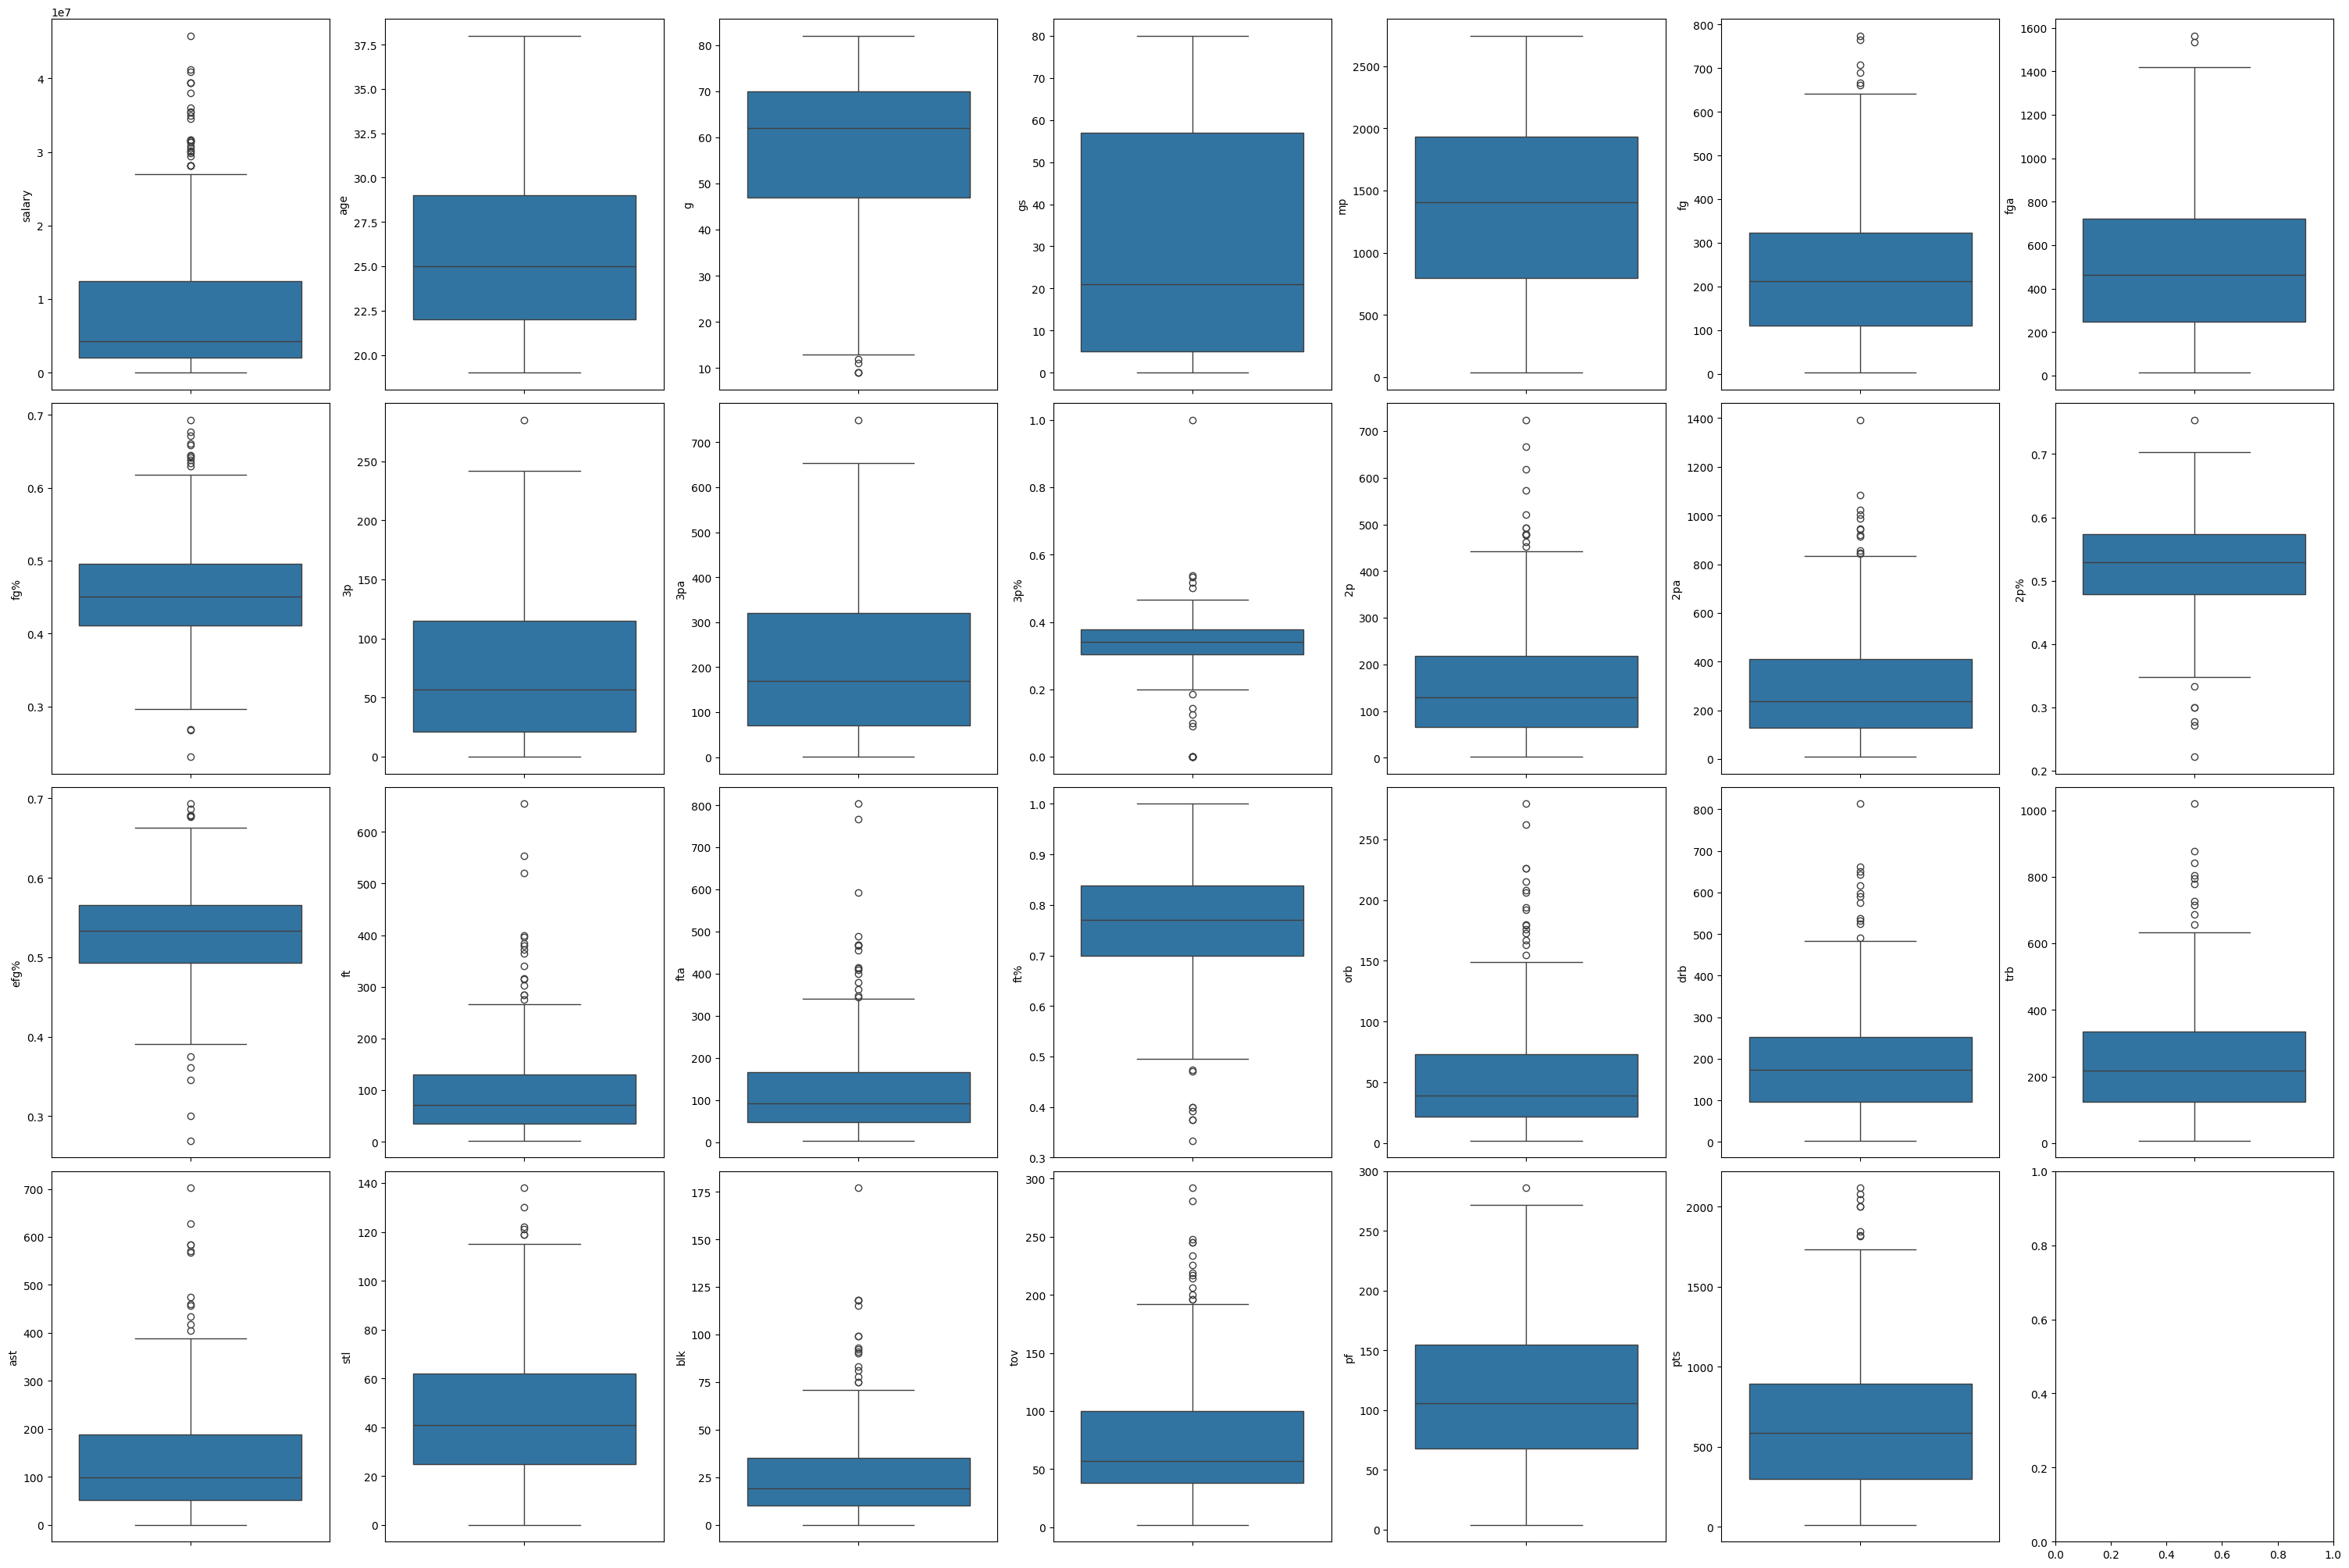

In [38]:
fig,axs=plt.subplots(ncols=7,nrows=4,figsize=(30,20))
index=0
axs=axs.flatten()
for k,v in nba_data_numeric.items():
  sns.boxplot(y=k,data=nba_data_numeric,ax=axs[index])
  index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=0.5)

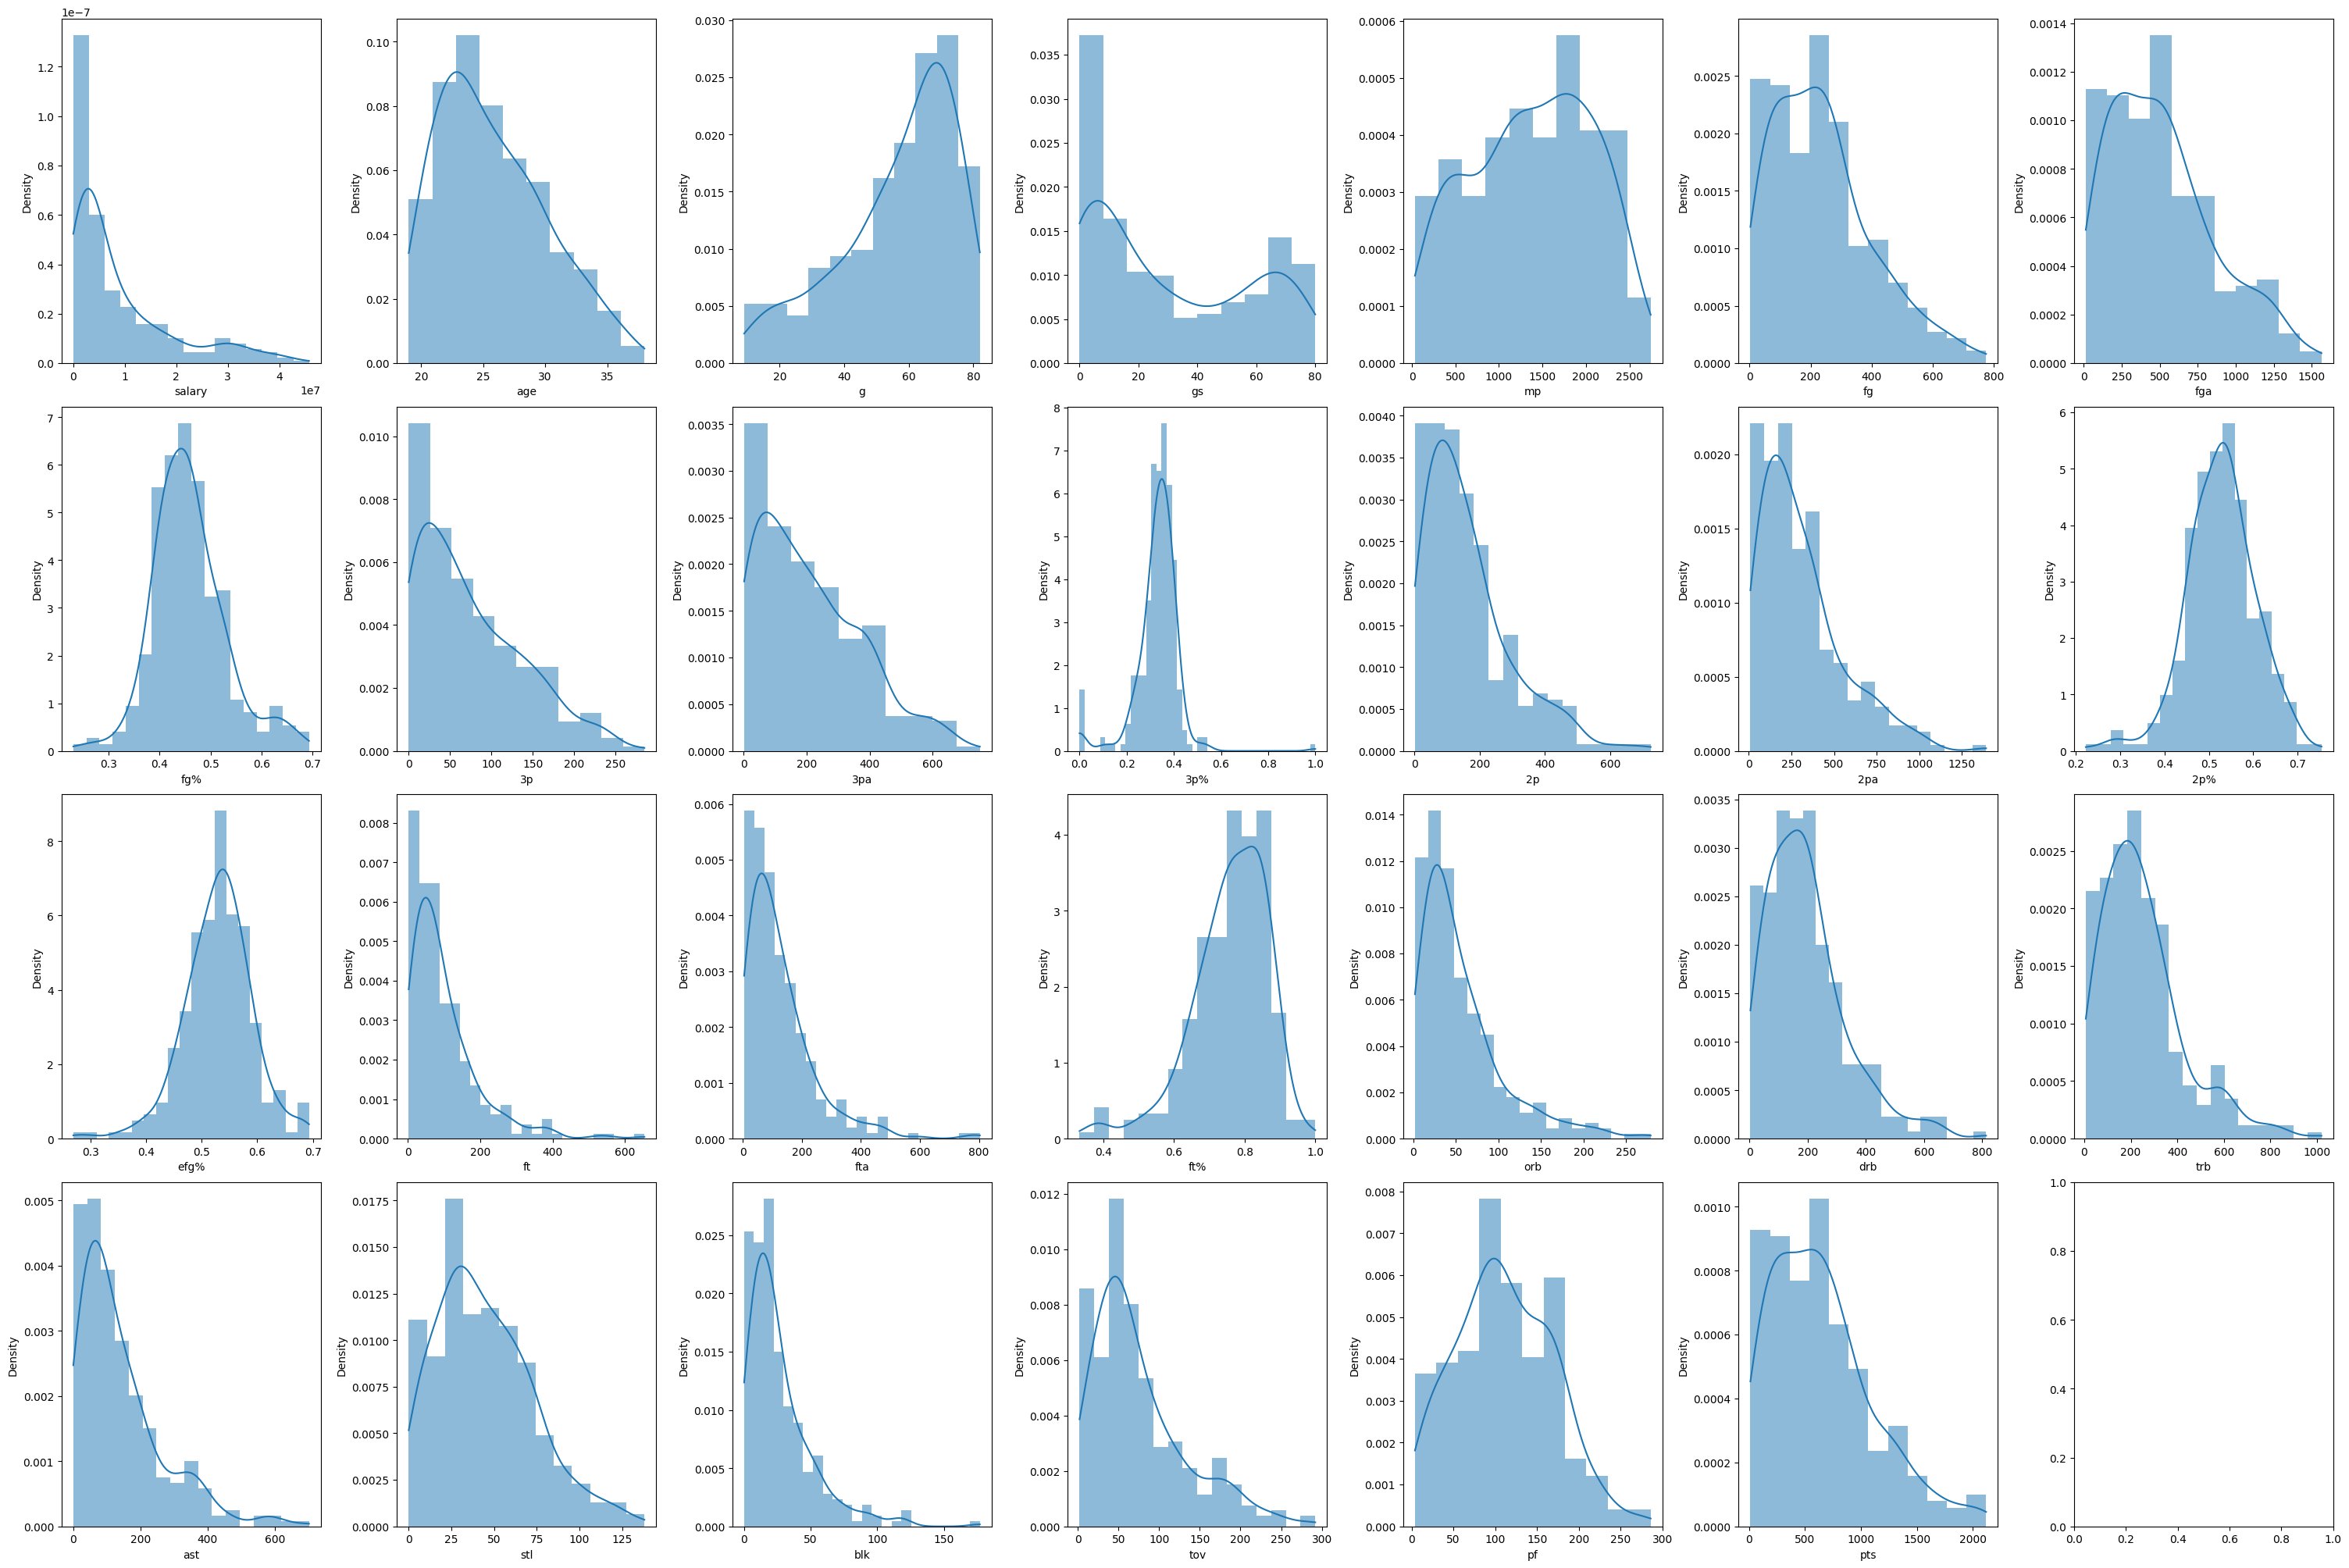

In [39]:
fig,axs=plt.subplots(ncols=7,nrows=4,figsize=(30,20))
index=0
axs=axs.flatten()
for k,v in nba_data_numeric.items():
  sns.histplot(v,ax=axs[index],kde=True,stat="density",linewidth=0)
  index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=0.5)

<Axes: >

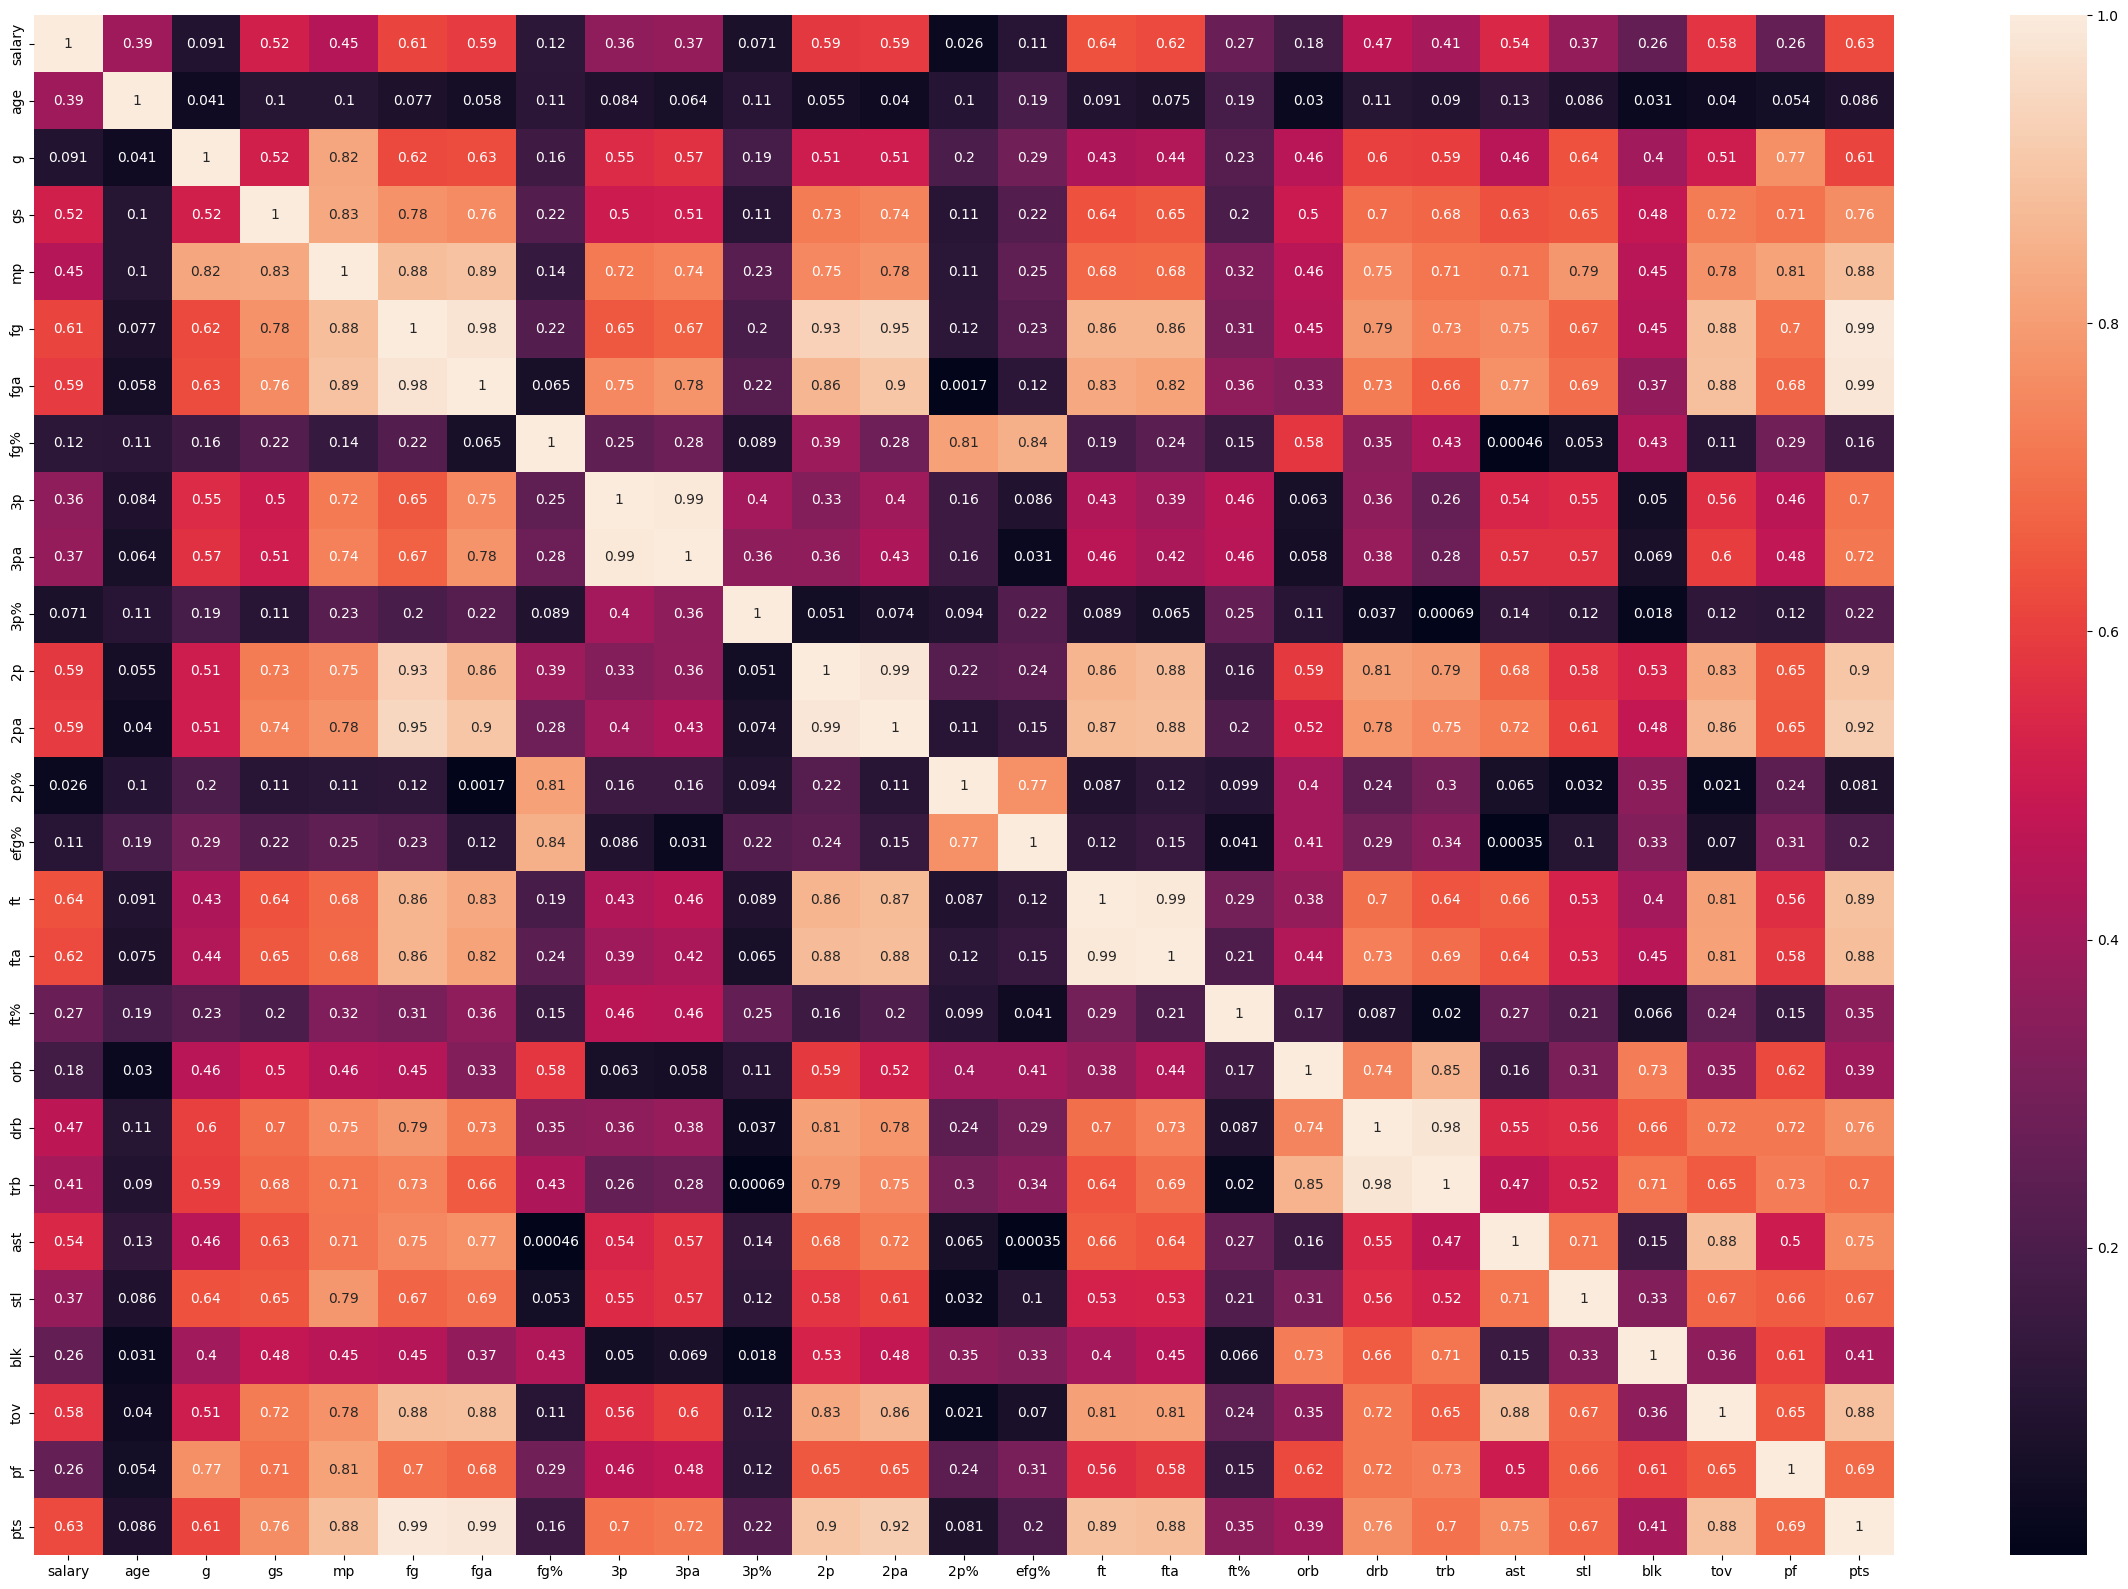

In [40]:
plt.figure(figsize=(30,20))
sns.heatmap(nba_data_numeric.corr().abs(),annot=True)

In [43]:
for k,v in nba_data_numeric.items():
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  v_col=v[(v<=q1-1.5*iqr) | (v > q3+1.5*iqr)]
  perc=np.shape(v_col)[0]*100.0/np.shape(nba_data_numeric)[0]
  print("%s Outliers=%.2f%%"%(k,perc))

salary Outliers=9.69%
age Outliers=0.00%
g Outliers=1.73%
gs Outliers=0.00%
mp Outliers=0.00%
fg Outliers=2.08%
fga Outliers=0.69%
fg% Outliers=4.84%
3p Outliers=0.35%
3pa Outliers=0.35%
3p% Outliers=6.57%
2p Outliers=4.50%
2pa Outliers=4.15%
2p% Outliers=2.42%
efg% Outliers=3.81%
ft Outliers=5.54%
fta Outliers=5.54%
ft% Outliers=2.77%
orb Outliers=5.54%
drb Outliers=4.15%
trb Outliers=3.46%
ast Outliers=4.15%
stl Outliers=2.08%
blk Outliers=5.54%
tov Outliers=4.84%
pf Outliers=0.35%
pts Outliers=2.77%


In [44]:
scaler=tf.constant(5)
scaler

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [45]:
vector=tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [46]:
matrix=tf.constant([[1,2],[3,4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [47]:
v_tensor=tf.Variable([5,6])
v_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 6], dtype=int32)>

In [48]:
print("Index 0:",v_tensor[0])
v_tensor[0].assign(8)
print("Index 0:",v_tensor[0])

Index 0: tf.Tensor(5, shape=(), dtype=int32)
Index 0: tf.Tensor(8, shape=(), dtype=int32)


In [49]:
rand_tensor=tf.random.Generator.from_seed(66)
rand_tensor=rand_tensor.normal(shape=(3,2),mean=0.0,stddev=1.0)
rand_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.5517507 , -0.3741098 ],
       [-0.28709963,  1.5089895 ],
       [-0.14833727, -1.2846565 ]], dtype=float32)>

In [50]:
np_array=np.arange(1,25,dtype=np.int32)
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [52]:
tensor2=tf.constant(np_array)
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [53]:
tensor3=tf.constant(np_array,shape=(6,2,2))
tensor3

<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]], dtype=int32)>

In [54]:
ic_sales=tf.constant([
    [22,34,21,5,6,0],
    [12,90,32,6,1,4],
    [8,78,54,32,1,0],
    [90,87,45,22,3,1]
])

In [55]:
ic_sales

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[22, 34, 21,  5,  6,  0],
       [12, 90, 32,  6,  1,  4],
       [ 8, 78, 54, 32,  1,  0],
       [90, 87, 45, 22,  3,  1]], dtype=int32)>

In [56]:
ic_price=tf.constant([[3,2,4,4]])
ic_price

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[3, 2, 4, 4]], dtype=int32)>

In [58]:
tf.matmul(ic_price,ic_sales)

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[482, 942, 523, 243,  36,  12]], dtype=int32)>

In [59]:
nba_data_numeric.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904


In [61]:
ct=make_column_transformer(
    (
        MinMaxScaler(),["age","pts"]
    )
)

In [62]:
print(ct)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'pts'])])


In [63]:
X=nba_data.drop("salary",axis=1)
y=nba_data["salary"]


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=66)

In [65]:
ct.fit(X_train)
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [66]:
X_train_normal

array([[0.22222222, 0.07787274],
       [0.44444444, 0.68138651],
       [0.5       , 0.43494777],
       [0.88888889, 0.16239316],
       [0.33333333, 0.33665717],
       [0.22222222, 0.36989554],
       [0.11111111, 0.30151947],
       [0.11111111, 0.4985755 ],
       [0.66666667, 0.15859449],
       [0.38888889, 0.49382716],
       [0.05555556, 0.26495726],
       [0.16666667, 0.6011396 ],
       [0.16666667, 0.29534663],
       [0.33333333, 0.27492877],
       [0.11111111, 0.27350427],
       [0.55555556, 0.18566002],
       [0.55555556, 0.5954416 ],
       [0.16666667, 0.2374169 ],
       [0.33333333, 0.10493827],
       [0.16666667, 0.31671415],
       [0.05555556, 0.06695157],
       [0.16666667, 0.66144349],
       [0.33333333, 0.85944919],
       [0.16666667, 0.00237417],
       [0.33333333, 0.44681861],
       [0.38888889, 0.44301994],
       [0.44444444, 0.62108262],
       [0.44444444, 0.73076923],
       [0.27777778, 0.41025641],
       [0.77777778, 0.24738841],
       [0.

In [67]:
tf.random.set_seed(66)
nba_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1),
])

In [70]:
nba_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['mae'])
fit_data=nba_model.fit(X_train_normal,y_train,epochs=100,verbose=0)

In [71]:
nba_model_loss,nba_model_mae=nba_model.evaluate(X_test_normal,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 4330451.5000 - mae: 4330451.5000


<Axes: xlabel='Epochs', ylabel='Loss'>

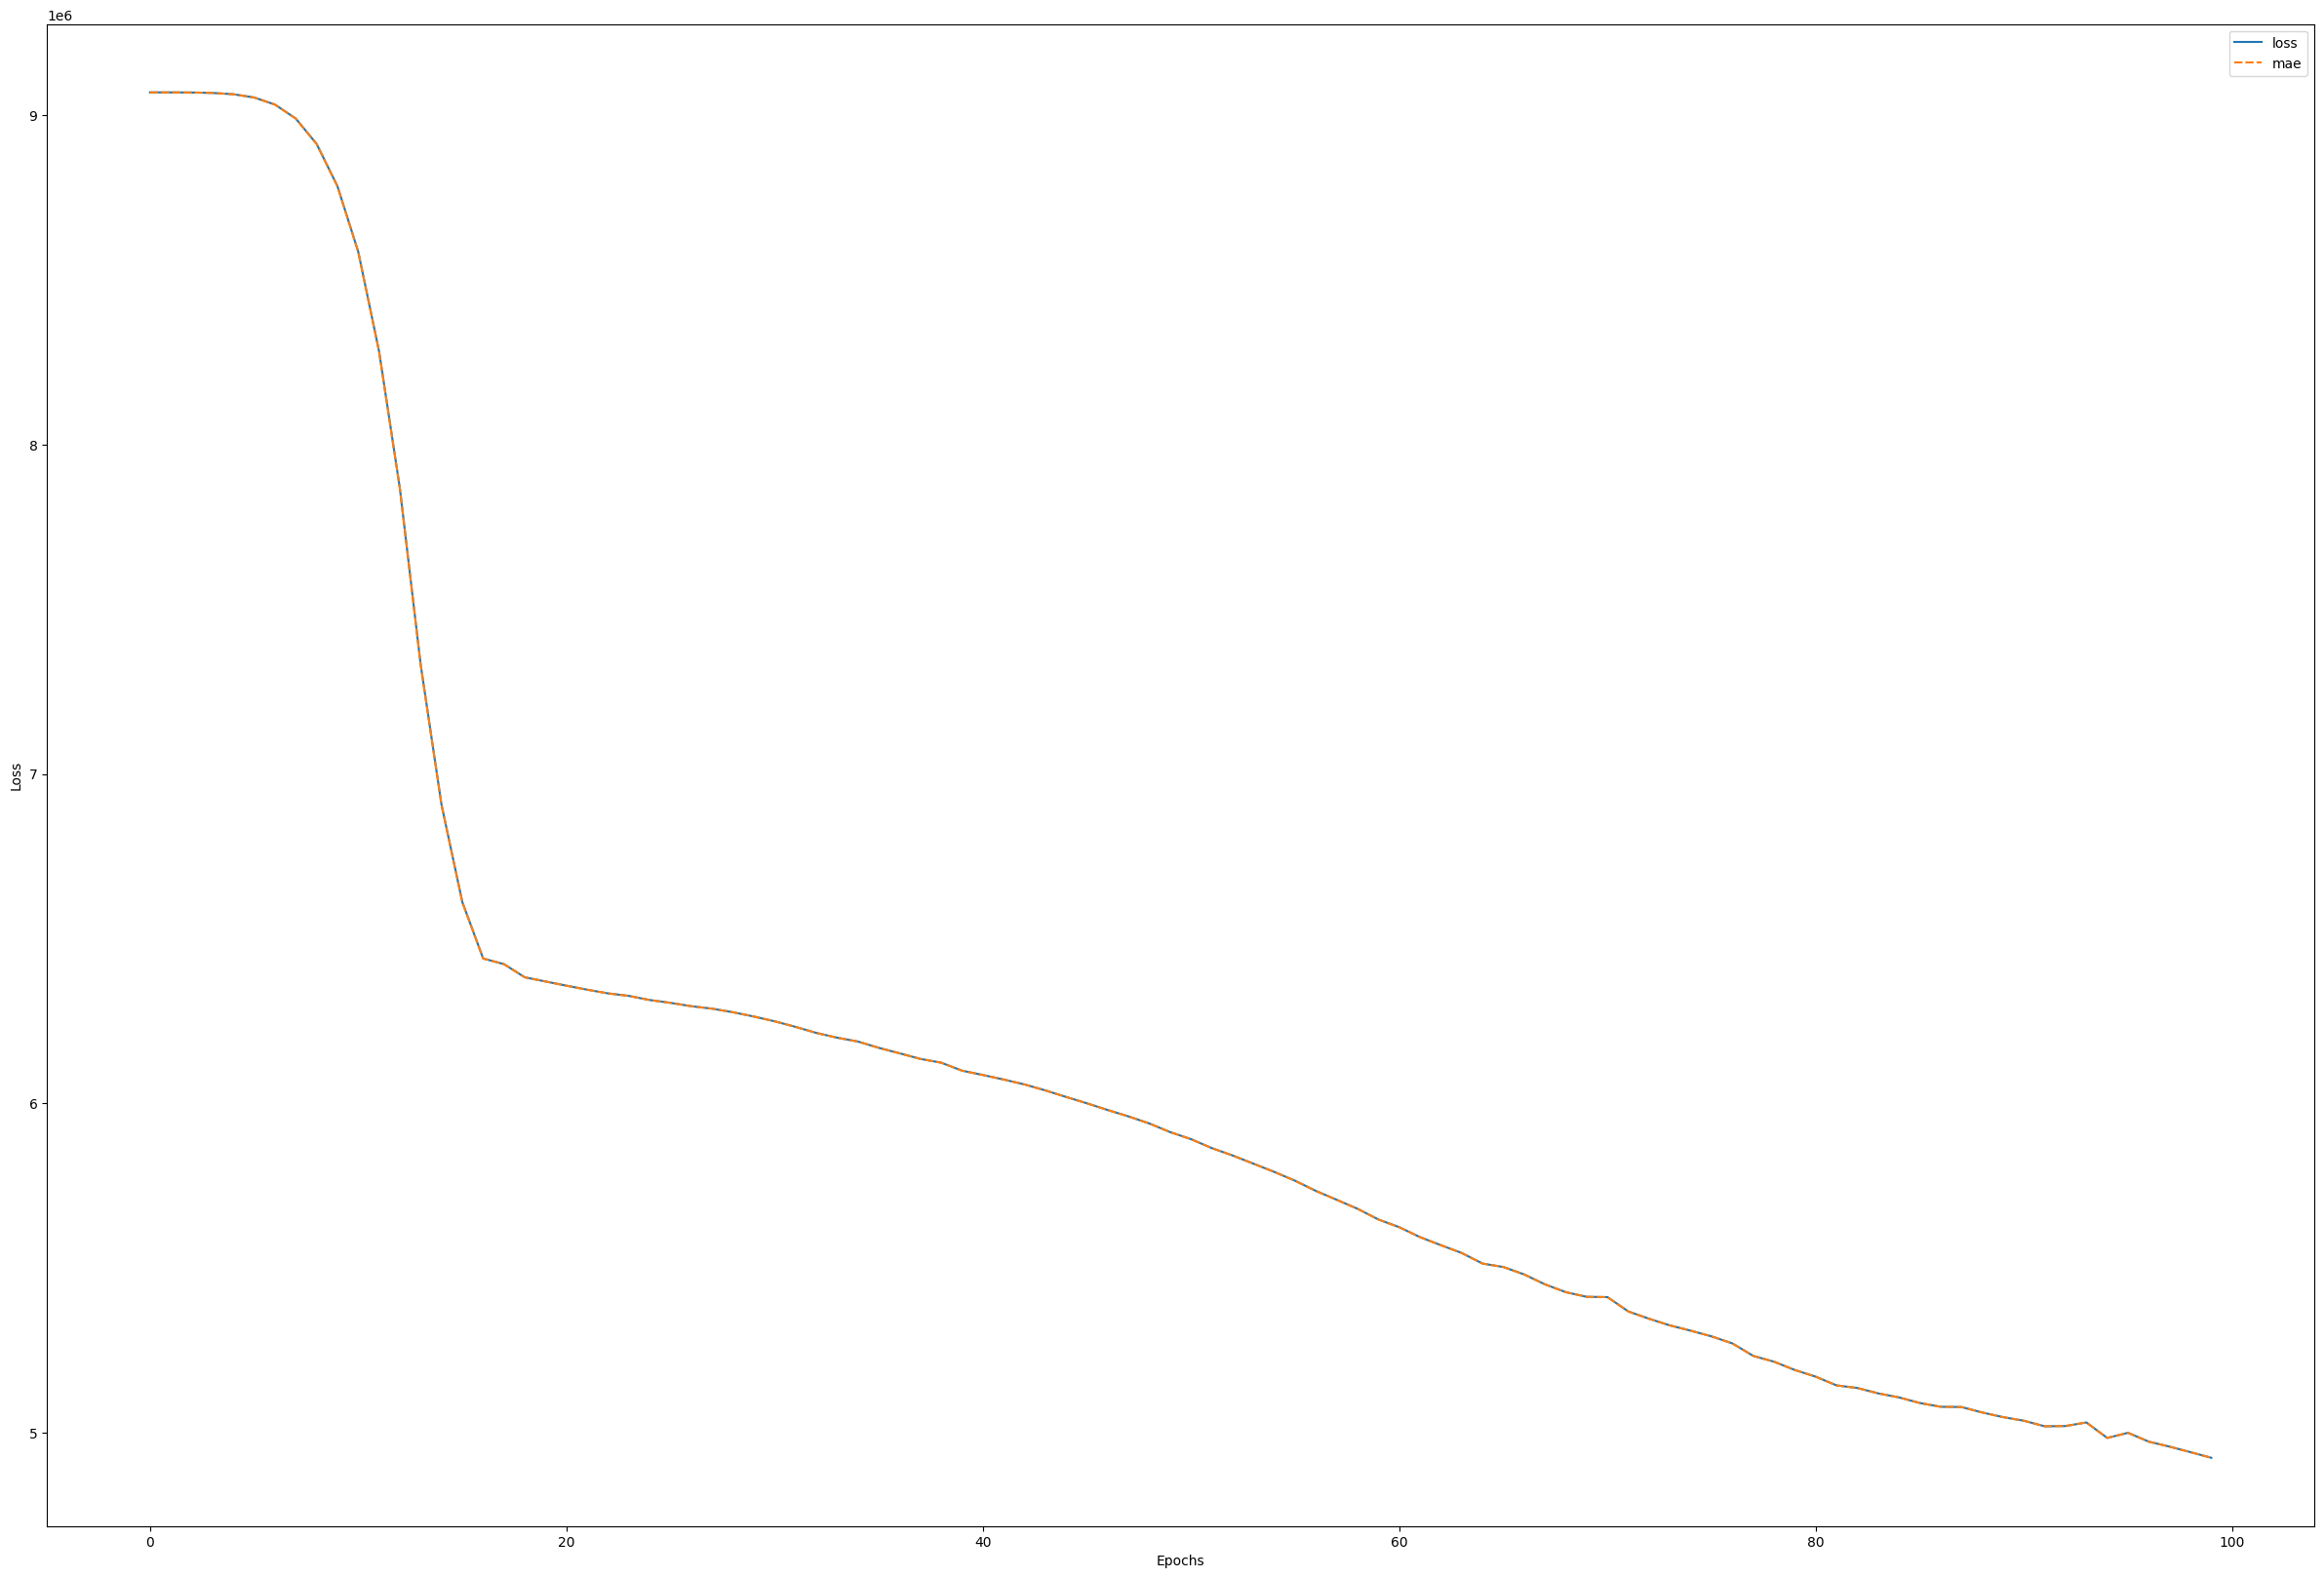

In [72]:
plt.figure(figsize=(30,20))
plt.ylabel("Loss")
plt.xlabel("Epochs")
sns.lineplot(data=fit_data.history)